# COVID-19 Mexico Analysis by Rodrigo Vázquez Casillas.

dataset downloaded from https://www.gob.mx/cms/uploads/attachment/file/544743/Tabla_casos_positivos_COVID-19_resultado_InDRE_2020.04.01.pdf

converted to csv with tabula.

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly
import plotly.graph_objs as go
import tabula
import datetime

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)


In [3]:
#Dataset uptdated trough april 11th
#https://www.gob.mx/cms/uploads/attachment/file/546234/Tabla_casos_positivos_COVID-19_resultado_InDRE_2020.04.12.pdf
dataset=pd.read_csv('positivosmx3.csv')
#Datos Actualizados al 31 de Marzo
df=pd.read_csv('positivosmx2.csv')
dataset

,N° Caso,Estado,Sexo,Edad,Fecha_Inicio,ID_Covid
0,1,MÉXICO,FEMENINO,75,2020-03-28,Confirmado
1,2,TAMAULIPAS,MASCULINO,22,2020-04-04,Confirmado
2,3,CIUDAD DE MÉXICO,MASCULINO,40,2020-03-17,Confirmado
3,4,CIUDAD DE MÉXICO,FEMENINO,29,2020-03-26,Confirmado
4,5,GUERRERO,FEMENINO,61,2020-04-06,Confirmado
...,...,...,...,...,...,...
4656,4657,MÉXICO,FEMENINO,28,2020-03-26,Confirmado
4657,4658,CIUDAD DE MÉXICO,FEMENINO,62,2020-03-18,Confirmado
4658,4659,CAMPECHE,FEMENINO,32,2020-03-31,Confirmado
4659,4660,BAJA CALIFORNIA SUR,FEMENINO,54,2020-03-29,Confirmado


In [4]:
dataset.columns #Column names

Index(['N° Caso', 'Estado', 'Sexo', 'Edad', 'Fecha_Inicio', 'ID_Covid'], dtype='object')

In [5]:
dataset.dtypes #data types

N° Caso          int64
Estado          object
Sexo            object
Edad             int64
Fecha_Inicio    object
ID_Covid        object
dtype: object

In [6]:
dataset['Estado'].unique() #states with at least 1 covid case

array(['MÉXICO', 'TAMAULIPAS', 'CIUDAD DE MÉXICO', 'GUERRERO',
       'NUEVO LEÓN', 'VERACRUZ', 'PUEBLA', 'YUCATÁN', 'TABASCO',
       'QUERETARO', 'JALISCO', 'AGUASCALIENTES', 'BAJA CALIFORNIA SUR',
       'SINALOA', 'COAHUILA', 'BAJA CALIFORNIA', 'SONORA',
       'SAN LUIS POTOSÍ', 'QUINTANA ROO', 'TLAXCALA', 'CHIHUAHUA',
       'GUANAJUATO', 'DURANGO', 'CHIAPAS', 'OAXACA', 'MORELOS', 'NAYARIT',
       'MICHOACÁN', 'HIDALGO', 'ZACATECAS', 'CAMPECHE', 'COLIMA'],
      dtype=object)

In [7]:
dataset['Estado'].nunique()

32

Every state has already at least 1 case.

In [8]:
dataset4= dataset.describe() 
dataset4=dataset4.drop('N° Caso',axis=1)

In [9]:
dataset4

,Edad
count,4661.000000
mean,45.671959
std,15.857408
min,0.000000
25%,34.000000
50%,45.000000
75%,57.000000
max,102.000000


In [10]:
xestado=dataset.groupby(['Estado']).mean()

In [11]:
xestado=xestado.drop('N° Caso',axis=1)

In [12]:
xestado

,Edad
Estado,
AGUASCALIENTES,41.290909
BAJA CALIFORNIA,44.382090
BAJA CALIFORNIA SUR,41.283333
CAMPECHE,49.105263
CHIAPAS,47.418605
CHIHUAHUA,42.557377
CIUDAD DE MÉXICO,45.957831
COAHUILA,42.573248
COLIMA,49.142857


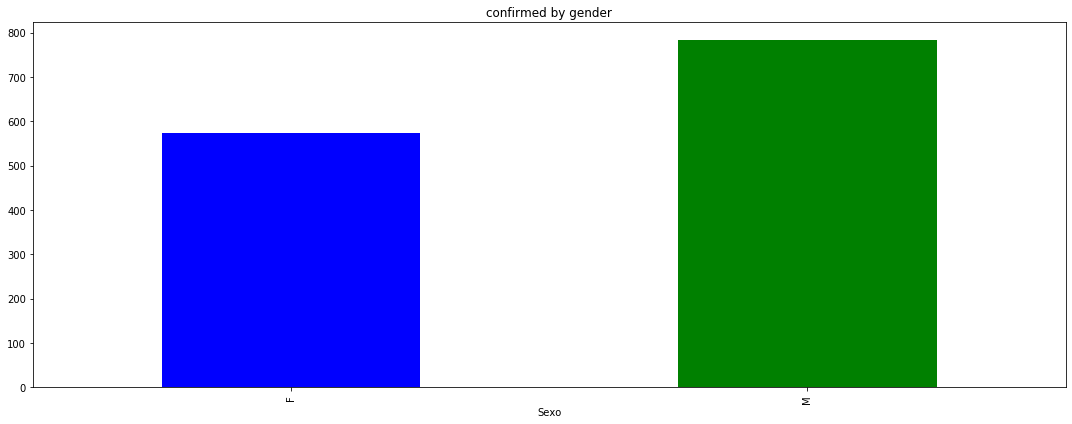

In [13]:
plt.figure(figsize=(15,6))
plt.title('confirmed by gender')
plt.xticks(rotation=90)
prv_lst = df.groupby('Sexo')['Sexo'].count()
prv_lst.plot(color=colors, kind='bar')
plt.tight_layout()

In [14]:
prv_lst

Sexo
F    574
M    784
Name: Sexo, dtype: int64

Covid-19 has afected more man (784) than woman (574)

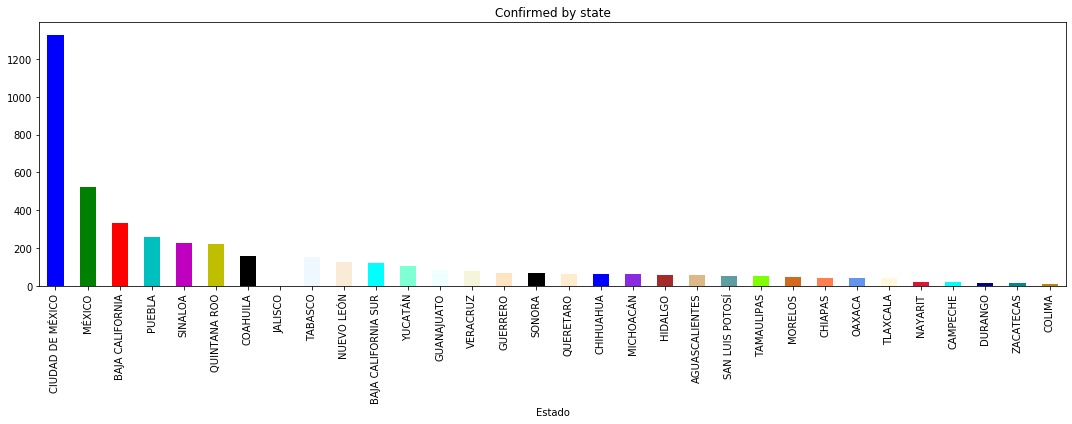

In [15]:
plt.figure(figsize=(15,6))
plt.title('Confirmed by state')
plt.xticks(rotation=90)
prv_2st = dataset.groupby('Estado')['Estado'].count().sort_values(ascending=False)
prv_2st.plot(color=colors, kind='bar')
plt.tight_layout()


In [16]:
prv_2st

Estado
CIUDAD DE MÉXICO       1328
MÉXICO                  523
BAJA CALIFORNIA         335
PUEBLA                  256
SINALOA                 229
QUINTANA ROO            223
COAHUILA                157
JALISCO                 156
TABASCO                 153
NUEVO LEÓN              124
BAJA CALIFORNIA SUR     120
YUCATÁN                 107
GUANAJUATO               82
VERACRUZ                 78
GUERRERO                 70
SONORA                   69
QUERETARO                61
CHIHUAHUA                61
MICHOACÁN                61
HIDALGO                  58
AGUASCALIENTES           55
SAN LUIS POTOSÍ          53
TAMAULIPAS               53
MORELOS                  44
CHIAPAS                  43
OAXACA                   43
TLAXCALA                 40
NAYARIT                  22
CAMPECHE                 19
DURANGO                  16
ZACATECAS                15
COLIMA                    7
Name: Estado, dtype: int64

Mexico city is the most affected state by almost a thousand cases more than the State of Mexico.

Jalisco is the state number 8 on the list, which leads me to think that the measures imposed by the state were helpful so that this number did not present an exponential increase, although I would have liked to have been able to analyze rates to see the place of Jalisco since being a state with so many inhabitants, it would surely have a better place.

In [17]:
Jalisco = dataset[dataset['Estado']=='JALISCO']
Jalisco

,N° Caso,Estado,Sexo,Edad,Fecha_Inicio,ID_Covid
14,15,JALISCO,MASCULINO,70,2020-04-05,Confirmado
17,18,JALISCO,FEMENINO,57,2020-03-16,Confirmado
22,23,JALISCO,MASCULINO,49,2020-03-12,Confirmado
23,24,JALISCO,FEMENINO,58,2020-03-27,Confirmado
165,166,JALISCO,FEMENINO,39,2020-03-18,Confirmado
...,...,...,...,...,...,...
4554,4555,JALISCO,FEMENINO,19,2020-03-22,Confirmado
4563,4564,JALISCO,MASCULINO,38,2020-03-20,Confirmado
4572,4573,JALISCO,FEMENINO,76,2020-03-08,Confirmado
4573,4574,JALISCO,MASCULINO,64,2020-03-14,Confirmado


In [18]:
Jalisco['Fecha_Inicio'] = pd.to_datetime(Jalisco['Fecha_Inicio'])
Jalisco2=dataset.sort_values(by=['Fecha_Inicio'])
Jalisco2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,N° Caso,Estado,Sexo,Edad,Fecha_Inicio,ID_Covid
2869,2870,CIUDAD DE MÉXICO,MASCULINO,42,2020-02-17,Confirmado
4617,4618,CIUDAD DE MÉXICO,MASCULINO,11,2020-02-17,Confirmado
3282,3283,MÉXICO,MASCULINO,45,2020-02-19,Confirmado
2294,2295,YUCATÁN,FEMENINO,38,2020-02-19,Confirmado
3357,3358,MÉXICO,MASCULINO,72,2020-02-21,Confirmado
...,...,...,...,...,...,...
3774,3775,MÉXICO,MASCULINO,61,2020-04-10,Confirmado
1340,1341,HIDALGO,FEMENINO,19,2020-04-11,Confirmado
1904,1905,QUERETARO,MASCULINO,13,2020-04-11,Confirmado
4564,4565,MÉXICO,MASCULINO,34,2020-04-11,Confirmado


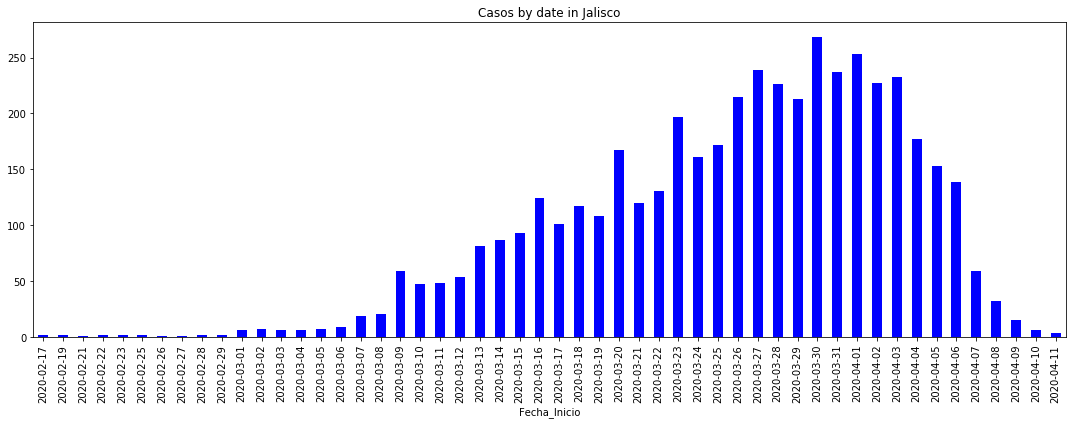

In [19]:
plt.figure(figsize=(15,6))
plt.title('Cases by date in Jalisco')
plt.xticks(rotation=90)
jal = Jalisco2.groupby('Fecha_Inicio')['Fecha_Inicio'].count()
jal.plot(color='b', kind='bar')
plt.tight_layout()

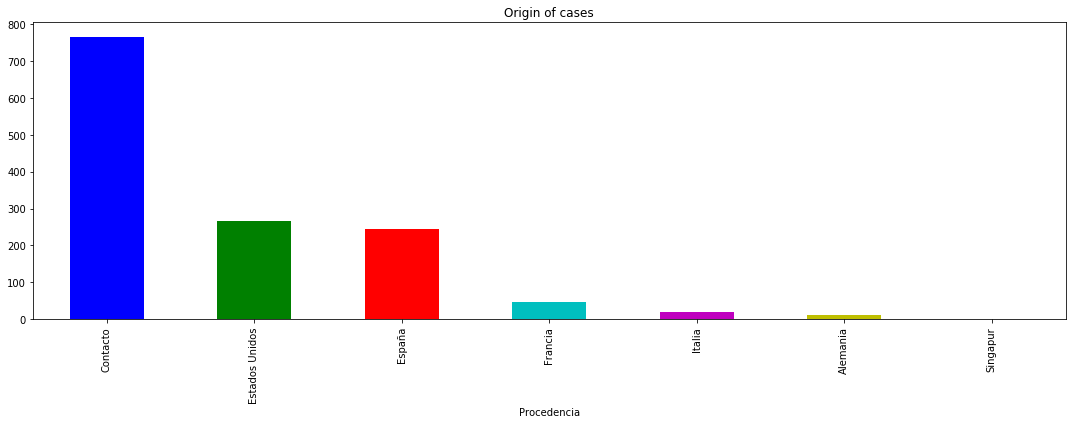

In [20]:
plt.figure(figsize=(15,6))
plt.title('Origin of cases')
plt.xticks(rotation=90)
prv_3st = df.groupby('Procedencia')['Procedencia'].count().sort_values(ascending=False)
prv_3st.plot(color=colors, kind='bar')
plt.tight_layout()

In [21]:
prv_3st

Procedencia
Contacto          766
Estados Unidos    266
España            244
Francia            47
Italia             21
Alemania           12
Singapur            2
Name: Procedencia, dtype: int64

Most cases have already been presented by contact, so the challenge is greater and more difficult to stop. We can also see that the majority of cases that did come from other countries were mostly from the United States and Spain.

In [22]:
dataset.isna().sum()

N° Caso         0
Estado          0
Sexo            0
Edad            0
Fecha_Inicio    0
ID_Covid        0
dtype: int64

In [23]:
dataset.dtypes

N° Caso          int64
Estado          object
Sexo            object
Edad             int64
Fecha_Inicio    object
ID_Covid        object
dtype: object

In [24]:
dataset['Fecha_Inicio'] = pd.to_datetime(dataset['Fecha_Inicio'])

In [25]:
dataset2=dataset.sort_values(by=['Fecha_Inicio'])
dataset2

,N° Caso,Estado,Sexo,Edad,Fecha_Inicio,ID_Covid
2869,2870,CIUDAD DE MÉXICO,MASCULINO,42,2020-02-17,Confirmado
4617,4618,CIUDAD DE MÉXICO,MASCULINO,11,2020-02-17,Confirmado
3282,3283,MÉXICO,MASCULINO,45,2020-02-19,Confirmado
2294,2295,YUCATÁN,FEMENINO,38,2020-02-19,Confirmado
3357,3358,MÉXICO,MASCULINO,72,2020-02-21,Confirmado
...,...,...,...,...,...,...
3774,3775,MÉXICO,MASCULINO,61,2020-04-10,Confirmado
1340,1341,HIDALGO,FEMENINO,19,2020-04-11,Confirmado
1904,1905,QUERETARO,MASCULINO,13,2020-04-11,Confirmado
4564,4565,MÉXICO,MASCULINO,34,2020-04-11,Confirmado


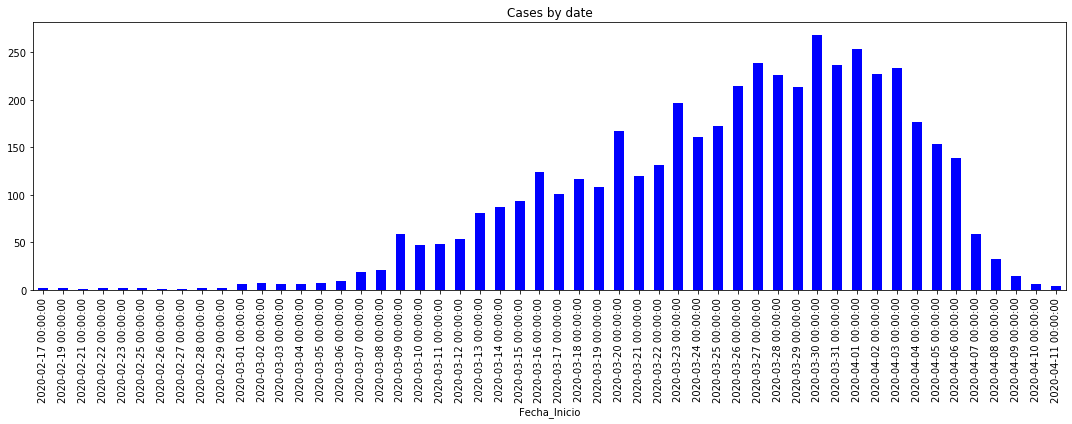

In [26]:
plt.figure(figsize=(15,6))
plt.title('Cases by date')
plt.xticks(rotation=90)
prv_4st = dataset2.groupby('Fecha_Inicio')['Fecha_Inicio'].count()
prv_4st.plot(color='b', kind='bar')
plt.tight_layout()

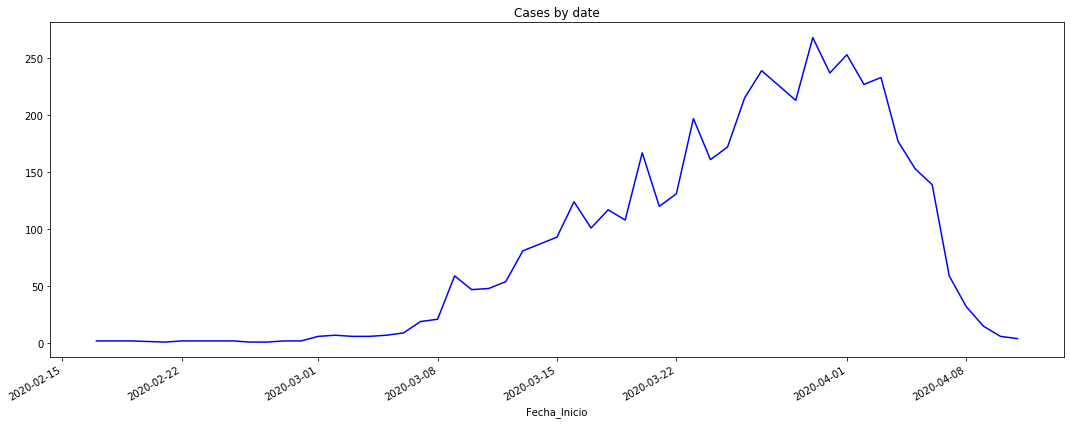

In [27]:
plt.figure(figsize=(15,6))
plt.title('Cases by date')
plt.xticks(rotation=90)
prv_4st = dataset2.groupby('Fecha_Inicio')['Fecha_Inicio'].count()
prv_4st.plot(color='b')
plt.tight_layout()

It seems strange that the trend was on the rise towards the end of March and at the beginning of April there has been a notable decrease, I do not know what the reason for this phenomenon is or if it may take time to update the data for closer days.

The behavior that Jalisco follows in a graph above is very similar to that of the whole country.

In [28]:
dataset3=dataset.sort_values(by=['Edad'])
dataset3.head(30)

,N° Caso,Estado,Sexo,Edad,Fecha_Inicio,ID_Covid
4131,4132,CIUDAD DE MÉXICO,MASCULINO,0,2020-04-01,Confirmado
1667,1668,CIUDAD DE MÉXICO,MASCULINO,0,2020-04-06,Confirmado
1635,1636,CIUDAD DE MÉXICO,MASCULINO,0,2020-04-02,Confirmado
169,170,CIUDAD DE MÉXICO,FEMENINO,0,2020-03-28,Confirmado
3256,3257,CIUDAD DE MÉXICO,FEMENINO,0,2020-04-03,Confirmado
2970,2971,TLAXCALA,MASCULINO,0,2020-04-02,Confirmado
769,770,CIUDAD DE MÉXICO,MASCULINO,0,2020-03-26,Confirmado
2626,2627,CIUDAD DE MÉXICO,MASCULINO,0,2020-04-07,Confirmado
3163,3164,MÉXICO,MASCULINO,0,2020-04-01,Confirmado
2737,2738,QUINTANA ROO,FEMENINO,0,2020-03-30,Confirmado


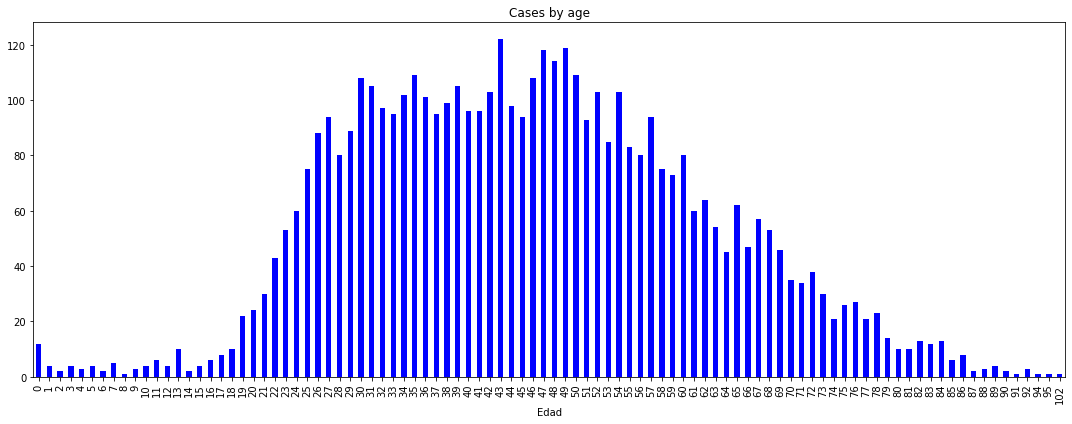

In [29]:
plt.figure(figsize=(15,6))
plt.title('Cases by age')
plt.xticks(rotation=90)
prv_5st = dataset3.groupby('Edad')['Edad'].count()
prv_5st.plot(color='b', kind='bar')
plt.tight_layout()

In [32]:
dataset4

,Edad
count,4661.000000
mean,45.671959
std,15.857408
min,0.000000
25%,34.000000
50%,45.000000
75%,57.000000
max,102.000000


We can see thanks to the statistical data stored in dataset 4, that the mean age is 45 years with a standard deviation of 15.85. We can see that 75% of the data are between 34 and 57 years old, we are talking about an age range of 23 years where the greatest number of cases are concentrated, which is why we could think that it is the most vulnerable range.